In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load CSV file
df = pd.read_csv("data.csv")

# Separate input (Sensor1, Sensor2) and output (Kp, Ki, Kd)
X = df[["Sensor1", "Sensor2"]].values
y = df[["Kp", "Ki", "Kd"]].values

# Scale inputs (optional)
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

# Scale outputs
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

# Reshape X for CNN (samples, steps, channels)
X = X.reshape((X.shape[0], X.shape[1], 1))  # From (N, 2) to (N, 2, 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build 1D CNN model
model = Sequential([
    Conv1D(16, kernel_size=1, activation='relu', input_shape=(2, 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3)  # Kp, Ki, Kd
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Save the model
model.save("pid_cnn_model.h5")

# Predict example
predicted_pid = scaler_y.inverse_transform(model.predict(X_test[:1]))
print("🔧 Predicted PID:", predicted_pid[0])


FileNotFoundError: [Errno 2] No such file or directory: 'sensor_data.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv("data.csv")

# Separate input (IR sensor readings) and output (PID values)
X = df[["Left", "Right"]].values
y = df[["Kp", "Ki", "Kd"]].values

# Normalize input and output
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Build enhanced model
model = Sequential([
    Dense(64, activation='relu', input_dim=2),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(3)  # Output layer for Kp, Ki, Kd
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Save model
model.save("pid_nn_model.keras")

# Predict a sample
predicted_scaled = model.predict(X_test[:1])
predicted_pid = scaler_y.inverse_transform(predicted_scaled)

print("🔧 Predicted PID values (Kp, Ki, Kd):", np.round(predicted_pid[0], 3))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - loss: 3.1904 - val_loss: 0.2245
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.9645 - val_loss: 0.2043
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.9579 - val_loss: 0.1880
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 2.5138 - val_loss: 0.1817
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 2.2462 - val_loss: 0.1759
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.9264 - val_loss: 0.1711
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.7828 - val_loss: 0.1667
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 2.0169 - val_loss: 0.1638
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 2.2062 - val_loss: 0.1602
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.8303 - val_loss: 0.1552
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.6946 - val_loss: 0.1502
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.5258 - val_loss: 0.14

In [ ]:
import tensorflow as tf

# Convert model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save it
with open("pid_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpe1v5gt7c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133016053893072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053891536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053896336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053896912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053897104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053895952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053893648: Tens

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optimize for microcontroller
converter.target_spec.supported_types = [tf.float32]  # Or tf.int8 for full quantization
tflite_model = converter.convert()

# Save the model
with open("pid_model_micro.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp2fswl1ft'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133016053893072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053891536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053894416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053896336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053896912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053897104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053895952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133016053893648: Tens

In [ ]:
!xxd -i pid_model_micro.tflite > pid_model.h

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the training dataset to recreate the scalers
df = pd.read_csv("data.csv")

# Prepare inputs and outputs to re-fit scalers
X = df[["Left", "Right"]].values
y = df[["Kp", "Ki", "Kd"]].values

# Re-create and fit scalers using training data
scaler_x = MinMaxScaler()
scaler_x.fit(X)

scaler_y = MinMaxScaler()
scaler_y.fit(y)

# Load the trained model
model = load_model("pid_nn_model.keras")

# Provide new sensor input (example)
new_input = np.array([[0.75, 0.6]])  # Replace with actual sensor values

# Scale new input
new_input_scaled = scaler_x.transform(new_input)

# Predict using model
predicted_scaled = model.predict(new_input_scaled)
predicted_pid = scaler_y.inverse_transform(predicted_scaled)

# Show the result
print("📊 Predicted PID Gains:")
print(f"Kp: {predicted_pid[0][0]:.3f}, Ki: {predicted_pid[0][1]:.3f}, Kd: {predicted_pid[0][2]:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
📊 Predicted PID Gains:
Kp: -0.923, Ki: -6.597, Kd: -0.854


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


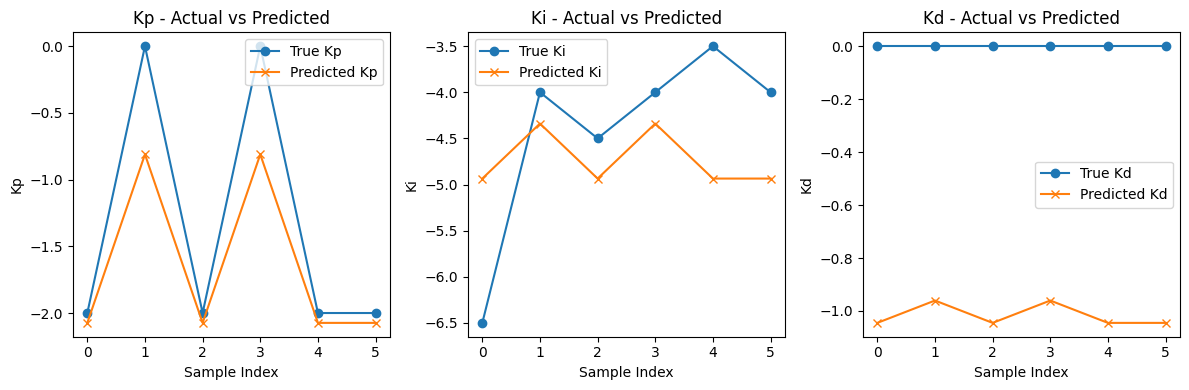

In [ ]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Plot Kp
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(y_true[:, 0], label='True Kp', marker='o')
plt.plot(y_pred[:, 0], label='Predicted Kp', marker='x')
plt.title('Kp - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Kp')
plt.legend()

# Plot Ki
plt.subplot(1, 3, 2)
plt.plot(y_true[:, 1], label='True Ki', marker='o')
plt.plot(y_pred[:, 1], label='Predicted Ki', marker='x')
plt.title('Ki - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Ki')
plt.legend()

# Plot Kd
plt.subplot(1, 3, 3)
plt.plot(y_true[:, 2], label='True Kd', marker='o')
plt.plot(y_pred[:, 2], label='Predicted Kd', marker='x')
plt.title('Kd - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Kd')
plt.legend()

plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


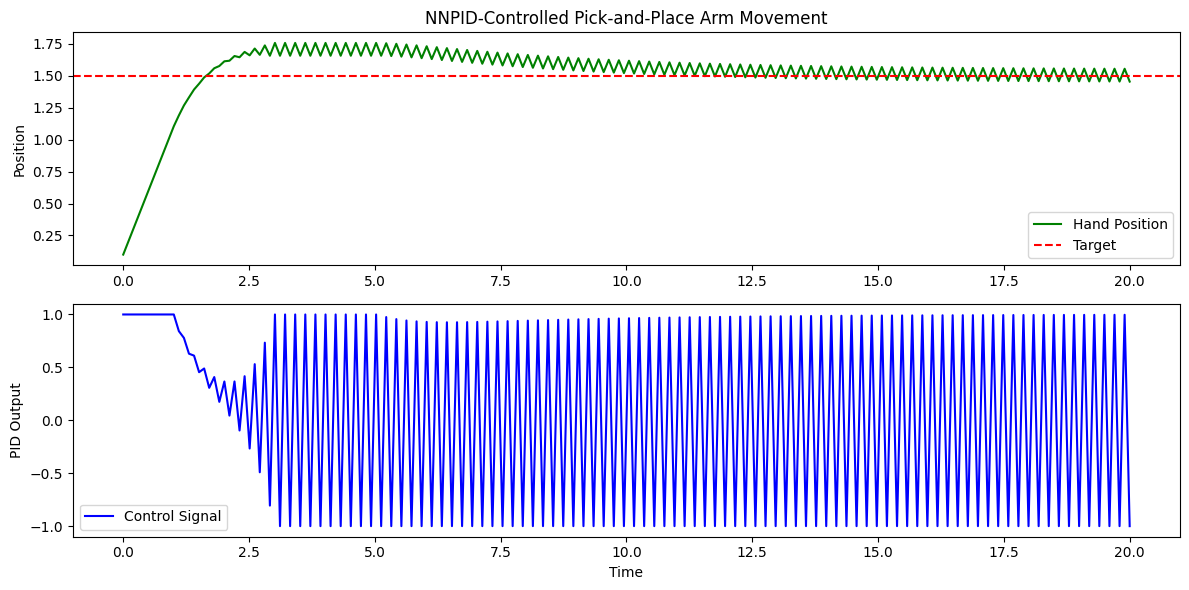

Predicted PID Values: Kp=2.973, Ki=0.644, Kd=1.065


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Prepare synthetic training data
np.random.seed(42)
data_size = 500
SD_front = np.random.uniform(0.3, 1.0, size=data_size)
SD_left = np.random.uniform(0.2, 0.9, size=data_size)

# Target values: Kp, Ki, Kd (you can replace this logic with real tuning data later)
Kp = 2 + 1.5 * SD_front - 0.5 * SD_left
Ki = 0.5 + 0.3 * SD_left
Kd = 1 + 0.2 * (SD_front - SD_left)

X = np.column_stack((SD_front, SD_left))
y = np.column_stack((Kp, Ki, Kd))

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

# Step 2: Neural Network Model to predict Kp, Ki, Kd
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(3, activation='linear')
      # Output = [Kp, Ki, Kd]
    # Dense(16, activation='relu', input_shape=(2,)),
    #  Dense(3, activation='linear')

])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

# Step 3: Predict PID for a new sensor reading (from dataset)
test_sample = np.array([[0.805, 0.479]])  # SD_front, SD_left
test_scaled = scaler_X.transform(test_sample)
pid_scaled = model.predict(test_scaled)
Kp_nn, Ki_nn, Kd_nn = scaler_y.inverse_transform(pid_scaled)[0]

# Step 4: Simulate PID Control
time = np.linspace(0, 20, 200)
dt = time[1] - time[0]
position = 0
target_position = 1.5
integral = 0
prev_error = 0

positions = []
controls = []

for t in time:
    error = target_position - position
    integral += error * dt
    derivative = (error - prev_error) / dt
    control = Kp_nn * error + Ki_nn * integral + Kd_nn * derivative
    control = np.clip(control, -1, 1)  # Simulating actuator limits
    position += control * dt

    positions.append(position)
    controls.append(control)
    prev_error = error

# Step 5: Plot the result
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, positions, label="Hand Position", color="green")
plt.axhline(y=target_position, color='red', linestyle='--', label="Target")
plt.title("NNPID-Controlled Pick-and-Place Arm Movement")
plt.ylabel("Position")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, controls, label="Control Signal", color="blue")
plt.xlabel("Time")
plt.ylabel("PID Output")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Predicted PID Values: Kp={Kp_nn:.3f}, Ki={Ki_nn:.3f}, Kd={Kd_nn:.3f}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate data
np.random.seed(42)
data_size = 500
SD_front = np.random.uniform(0.3, 1.0, size=data_size)
SD_left = np.random.uniform(0.2, 0.9, size=data_size)
Kp = 2 + 1.5 * SD_front - 0.5 * SD_left
Ki = 0.5 + 0.3 * SD_left
Kd = 1 + 0.2 * (SD_front - SD_left)
X = np.column_stack((SD_front, SD_left))
y = np.column_stack((Kp, Ki, Kd))

# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

# Build model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(3, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Export to C header
with open("pid_model_micro_tflite3.h", "w") as f:
    hex_array = ', '.join(f'0x{b:02x}' for b in tflite_model)
    f.write('#ifndef PID_MODEL_MICRO_TFLITE_H\n')
    f.write('#define PID_MODEL_MICRO_TFLITE_H\n\n')
    f.write(f'unsigned char pid_model_micro_tflite[] = {{ {hex_array} }};\n')
    f.write(f'unsigned int pid_model_micro_tflite_len = {len(tflite_model)};\n\n')
    f.write('#endif // PID_MODEL_MICRO_TFLITE_H\n')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Saved artifact at '/tmp/tmp937uj178'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133201478152848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133201478146128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133201460994960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133201460997072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133201460994768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133201460991888: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import pandas as pd
import numpy as np

# Load dataset (assumed to contain SD_front, SD_left, and Class describing hand action)
data = pd.read_csv("/sensor_readings_2.csv", header=None)
data.columns = ['SD_front', 'SD_left', 'Class']

# Setpoints for hand movement (e.g., desired distances or positions for alignment)
setpoint_front = 1.0   # for forward-backward motion (e.g., shoulder or elbow)
setpoint_left = 0.8    # for side motion (e.g., base rotation)
dt = 0.1               # time step in seconds

# Initialize lists
error_front, integral_front, derivative_front = [], [], []
error_left, integral_left, derivative_left = [], [], []

int_front = 0
int_left = 0
prev_error_front = 0
prev_error_left = 0

# Calculate PID values for each direction
for i in range(len(data)):
    # Front sensor PID terms
    err_f = setpoint_front - data.loc[i, 'SD_front']
    int_front += err_f * dt
    der_f = (err_f - prev_error_front) / dt

    error_front.append(err_f)
    integral_front.append(int_front)
    derivative_front.append(der_f)
    prev_error_front = err_f

    # Left sensor PID terms
    err_l = setpoint_left - data.loc[i, 'SD_left']
    int_left += err_l * dt
    der_l = (err_l - prev_error_left) / dt

    error_left.append(err_l)
    integral_left.append(int_left)
    derivative_left.append(der_l)
    prev_error_left = err_l

# Add computed PID terms to DataFrame
data['error_front'] = error_front
data['integral_front'] = integral_front
data['derivative_front'] = derivative_front

data['error_left'] = error_left
data['integral_left'] = integral_left
data['derivative_left'] = derivative_left

# Map each action class to angles for different joints (example values)
class_to_angles = {
    'Move-Forward':        [90, 90, 30],   # Base, Arm, Gripper
    'Sharp-Right-Turn':    [130, 90, 30],
    'Slight-Right-Turn':   [110, 90, 30],
    'Slight-Left-Turn':    [70, 90, 30],
    'Pick':                [90, 100, 15],
    'Place':               [90, 80, 45],
    'Hold':                [90, 90, 10],
}

# Map to three separate columns (for servo angles)
angle_data = data['Class'].map(class_to_angles)
data[['Angle_Base', 'Angle_Arm', 'Angle_Gripper']] = pd.DataFrame(angle_data.tolist(), index=data.index)

# Final input and output sets
X = data[['error_front', 'integral_front', 'derivative_front',
          'error_left', 'integral_left', 'derivative_left']]
y = data[['Angle_Base', 'Angle_Arm', 'Angle_Gripper']]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


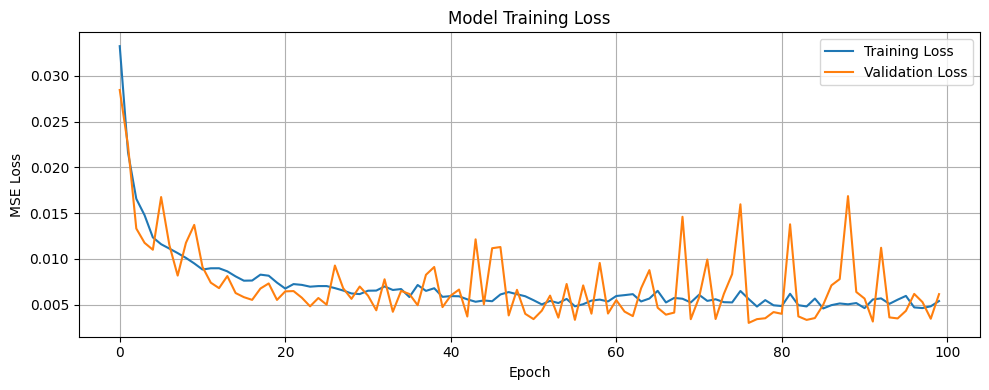

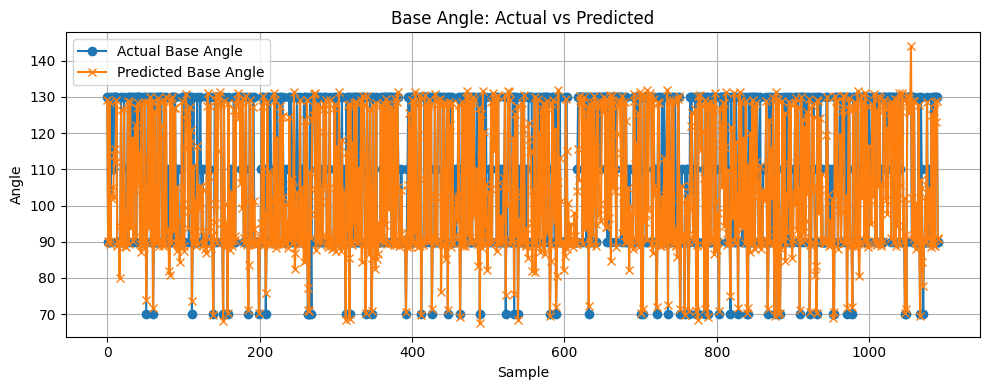

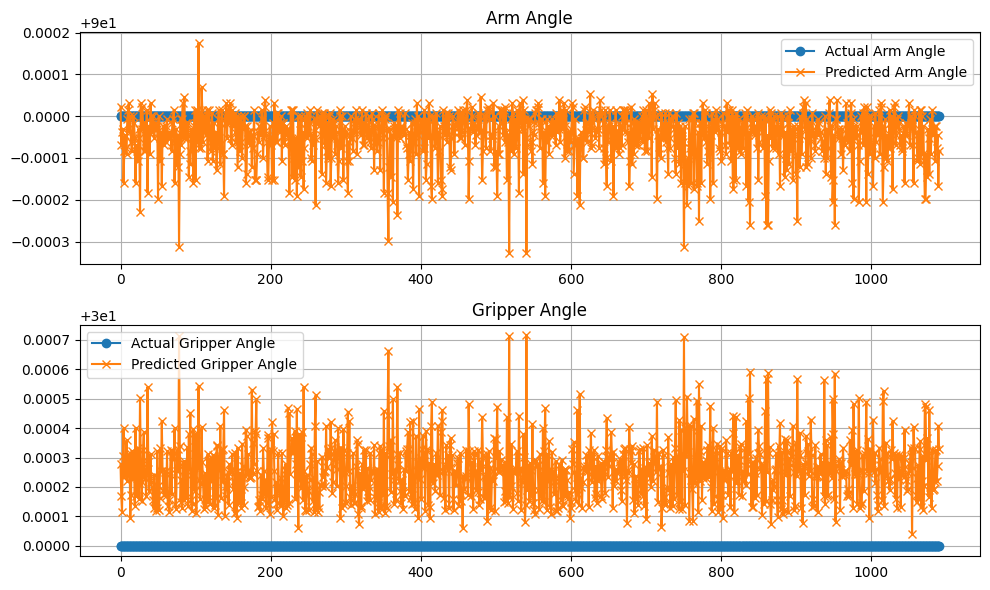

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and prepare dataset
data = pd.read_csv("/sensor_readings_2.csv", header=None)
data.columns = ['SD_front', 'SD_left', 'Class']

# Setpoints and PID calculations (same as previous step)
setpoint_front = 1.0
setpoint_left = 0.8
dt = 0.1
ef, ifr, df = [], [], []
el, il, dl = [], [], []
intf, intl = 0, 0
pef, pel = 0, 0

for i in range(len(data)):
    # Front
    e = setpoint_front - data.loc[i, 'SD_front']
    intf += e * dt
    d = (e - pef) / dt
    ef.append(e)
    ifr.append(intf)
    df.append(d)
    pef = e

    # Left
    e2 = setpoint_left - data.loc[i, 'SD_left']
    intl += e2 * dt
    d2 = (e2 - pel) / dt
    el.append(e2)
    il.append(intl)
    dl.append(d2)
    pel = e2

# Add to dataframe
data['error_front'] = ef
data['integral_front'] = ifr
data['derivative_front'] = df
data['error_left'] = el
data['integral_left'] = il
data['derivative_left'] = dl

# Map class to angle setpoints
class_to_angles = {
    'Move-Forward':        [90, 90, 30],
    'Sharp-Right-Turn':    [130, 90, 30],
    'Slight-Right-Turn':   [110, 90, 30],
    'Slight-Left-Turn':    [70, 90, 30],
    'Pick':                [90, 100, 15],
    'Place':               [90, 80, 45],
    'Hold':                [90, 90, 10],
}
angle_data = data['Class'].map(class_to_angles)
data[['Angle_Base', 'Angle_Arm', 'Angle_Gripper']] = pd.DataFrame(angle_data.tolist(), index=data.index)

# Prepare data
X = data[['error_front', 'integral_front', 'derivative_front',
          'error_left', 'integral_left', 'derivative_left']]
y = data[['Angle_Base', 'Angle_Arm', 'Angle_Gripper']]

# Normalize inputs and outputs
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='linear')  # 3 outputs: Base, Arm, Gripper
])

model.compile(optimizer=Adam(0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Plot: Loss over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Predicted vs Actual Angles for Base
plt.figure(figsize=(10, 4))
plt.plot(y_true[:, 0], label='Actual Base Angle', marker='o')
plt.plot(y_pred[:, 0], label='Predicted Base Angle', marker='x')
plt.title('Base Angle: Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Angle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Arm and Gripper predictions
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(y_true[:, 1], label='Actual Arm Angle', marker='o')
axs[0].plot(y_pred[:, 1], label='Predicted Arm Angle', marker='x')
axs[0].set_title('Arm Angle')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(y_true[:, 2], label='Actual Gripper Angle', marker='o')
axs[1].plot(y_pred[:, 2], label='Predicted Gripper Angle', marker='x')
axs[1].set_title('Gripper Angle')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
from scipy.signal import tf2ss, place_poles

# PID Gains
Kp = -2.074
Ki = -4.935
Kd = -1.045

# Define the transfer function of a typical second-order system (assumed for calculation)
# Let's assume a plant: G(s) = 1 / (s^2 + 2s + 1)
# PID controller in Laplace: Kp + Ki/s + Kd*s = (Kd*s^2 + Kp*s + Ki)/s
# Open-loop transfer function with PID: (Kd*s^2 + Kp*s + Ki) / (s*(s^2 + 2s + 1))

# Let's represent the closed-loop system as a state-space model to find the A matrix
# We define the characteristic equation of the closed-loop system

# Define numerator and denominator of the closed-loop transfer function
# Based on a unity feedback system

# Open-loop transfer function numerator and denominator
num_pid = [Kd, Kp, Ki]
den_plant = [1, 2, 1]
num = np.polymul(num_pid, [1])  # PID numerator
den = np.polymul([1, 0], den_plant)  # s*(s^2 + 2s + 1)

# Closed-loop transfer function
# H(s) = G(s) / (1 + G(s))
# Denominator of closed-loop = den + num
# Find A matrix of the system using state-space representation

# Convert to state-space
A, B, C, D = tf2ss(num, den)

# Compute eigenvalues of A
eigenvalues = np.linalg.eigvals(A)

A, eigenvalues


(array([[-2., -1., -0.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]]),
 array([ 0., -1., -1.]))